# Coursework
# SPCE0038: Machine Learning with Big-Data

---

## Overview

This coursework is provided as a Jupyter notebook, which you will need to complete.  

Throughout the notebook you will need to complete code, analytic exercises (if equations are required please typeset your solutions using latex in the markdown cell provided) and descriptive answers. Much of the grading of the coursework will be performed automatically, so it is critical you name your variables as requested.

Before you turn this coursework in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says "YOUR ANSWER HERE" or `YOUR CODE HERE` and remove remove the `raise NotImplementedError()` exceptions that are thrown before you have added your answers. Do not add and remove cells but rather provide your answers in the spaces given.

Please also:
- Make sure your notebook executes without errors.
- Do not overwrite or rename any existing variables.
- Do not install code or packages in the notebooks.

Please rename the notebook filename to include your name in the filename.  And please also add your name below:

In [2]:
NAME = "21189095"

You will be able to run some basic tests in the notebook to check the basic operation of your code is as expected.  Although do not assume your responses are complete or fully correct just because the basic tests pass.

Once you have renamed the notebook file and completed the exercises, please upload the notebook to Moodle.


---

## AstroML

The data used is this coursework is obtained using [AstroML](http://www.astroml.org), a python package for machine learning for astronomy.  Although we take data from AstroML, this coursework is not based on standard AstroML examples.  So you will *not* find the solutions in AstroML examples!

## SDSS

The data obtained through AstroML was observed by the [Sloan Digital Sky Survey](https://www.sdss.org/) (SDSS), which began observations in 2000.  SDSS data have lead to many scientific advances and the experiment is widely seen as one of the most successful surveys in the history of astronomy.

---

## Dependencies

- Standard course dependencies (e.g. numpy, scikit-learn, etc.)
- [AstoML](http://www.astroml.org)
- [AstroPy](http://www.astropy.org/)

---

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
def check_var_defined(var):
    try:
        exec(var)
    except NameError:
        raise NameError(var + " not defined.")
    else:
        print(var + " defined.")

## Part 1: Regression

In these exercises we will consider the regression problem of the astonomical distance modulus vs redshift relationship.

In astronomy, the [distance modulus](https://en.wikipedia.org/wiki/Distance_modulus) specifies the difference between the apparent and absolute magnitudes of an astronomnical object.  It provides a way of expressing astrophysical distances. 

Astronomical [redshift](https://en.wikipedia.org/wiki/Redshift) specifies the shift in wavelength that astronomical objects undergo due to the expansion of the Universe.  Due to Hubble's Law, more distance objects experience a greater redshift.


In [5]:
from astroML.datasets import generate_mu_z

In [6]:
# Load data
m = 150
z_sample, mu_sample, dmu = generate_mu_z(m, random_state=3)
# print(mu_sample,dmu)

*Plot the distance modulus ($\mu$) vs redhift ($z$), including error bars.*

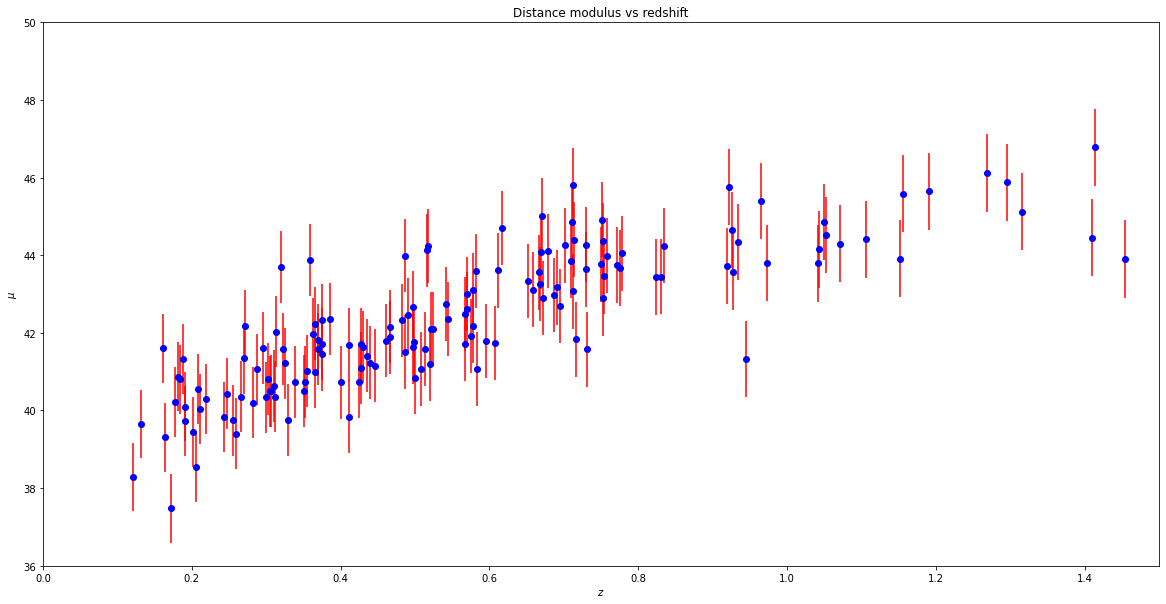

In [7]:
# Plot data
def plot_dist_mod():
    # YOUR CODE HERE
    # raise NotImplementedError()
    plt.figure(figsize=(20,10))
    plt.errorbar(z_sample, mu_sample, yerr=dmu, fmt='bo', ecolor='r')
    plt.xlabel('$z$')
    plt.ylabel('$\mu$')
    plt.title('Distance modulus vs redshift')
    plt.ylim(36, 50)
    plt.xlim(0, 1.5)
plot_dist_mod()

Recall the normal equations for linear regression follow by analytically minimising the cost function: 

$$\min_\theta\ C(\theta) = \min_\theta \ (X \theta - y)^{\rm T}(X \theta - y).$$

Show analytically that the solution is given by 

$$ \hat{\theta} = \left( X^{\rm T} X \right)^{-1} X^{\rm T} y. $$

[Matrix calculus identities](https://en.wikipedia.org/wiki/Matrix_calculus) may be useful (note that we use the denominator layout convention).

*Expand the cost function and drop terms that do not depend on $\theta$ (use latex mathematics expressions):*

YOUR ANSWER HERE
$$ C(\theta) = (X \theta - y)^{\rm T}(X \theta - y)$$
$$ C(\theta) = ((X \theta)^{\rm T} - y^{\rm T})(X \theta - y)$$
$$ C(\theta) = (X \theta)^{\rm T}\cdot(X \theta) - (X \theta)^{\rm T}\cdot y - y^{\rm T}\cdot(X \theta) + (y^{\rm T})\cdot y$$
*then drop terms do not depend on $\theta$ :
$$ C(\theta) = (X \theta)^{\rm T}\cdot(X \theta) - (X \theta)^{\rm T}\cdot y - y^{\rm T}\cdot(X \theta)$$
$$ C(\theta) = X^{\rm T} \theta^{\rm T} X \theta - 2 (X \theta)^{\rm T}\cdot y$$





*Set the derivative to zero and solve for $\theta$ (use latex mathematics expressions):*

YOUR ANSWER HERE
$$\frac{\partial C(\theta)}{\partial \theta} = 2 X^{\rm T} X \theta - 2 X^{\rm T}\cdot y = 0$$
$$ X^{\rm T} X \theta = X^{\rm T}\cdot y$$
$$ \theta = ( X^{\rm T} X)^{-1}X^{\rm T}\cdot y$$
then
$$ \hat{\theta} = \left( X^{\rm T} X \right)^{-1} X^{\rm T} y $$

*Solve for $\theta$ by numerically implementing the analytic solution given above.*

In [8]:
def compute_theta_lin_reg(X, y):
    # YOUR CODE HERE
    # raise NotImplementedError()
    # print(X.shape,np.transpose(X).shape,y.shape)
    # a =  np.transpose(X)@ X
    # print(a)
    # add 1 as the first colunm to generate the theta_0
    X_new = np.c_[np.ones((len(X),1)),X]
    # print(X_new.shape)
    theta = np.linalg.inv((np.transpose(X_new)@ X_new)) @ np.transpose(X_new)@ y
    # print(theta,theta.shape)
    return theta

In [9]:
assert compute_theta_lin_reg(z_sample, mu_sample).shape == (2,)
theta = compute_theta_lin_reg(z_sample, mu_sample)
(theta_c, theta_m) = theta
print("Linear regression parameters recovered analytically: intercept={0:.4f}, slope={1:.4f}".format(theta_c, theta_m))

Linear regression parameters recovered analytically: intercept=39.5505, slope=4.9538


In [10]:
check_var_defined('theta_c')
check_var_defined('theta_m')

theta_c defined.
theta_m defined.


*Write a method to make a prediction for a given redshift.*

In [11]:
def predict_lin_reg(theta, x):
    # YOUR CODE HERE
    # raise NotImplementedError()
    y = theta[0] + theta[1]*x
    return y

*Predict the distance modulus for a range of redshift values between 0.01 and 1.5 and plot the predicted curve overlayed on data (make a new plot; do not revise the plot above).  Call the variable used to store the predictions for your polynomial model `mu_pred_lin`.*

<function matplotlib.pyplot.show(close=None, block=None)>

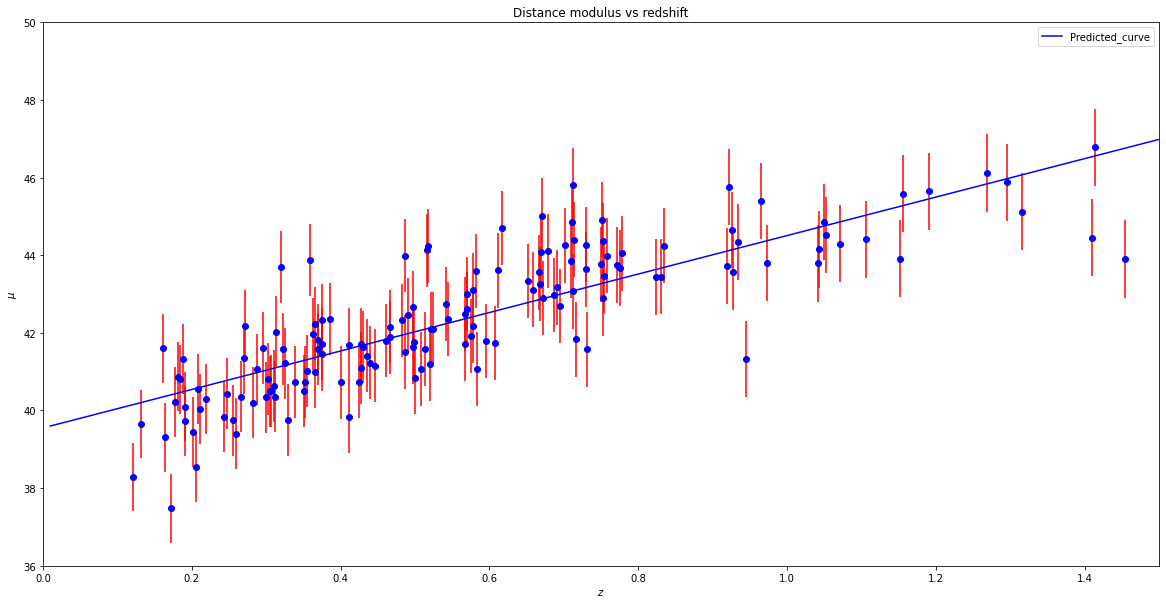

In [12]:
z = np.linspace(0.01, 1.5, 1000)
plot_dist_mod()
# YOUR CODE HERE
mu_pred_lin = predict_lin_reg(theta, z)
# print(mu_pred_lin)
plt.plot(z,mu_pred_lin,'b-',label="Predicted_curve")
plt.legend()
plt.show
# raise NotImplementedError()


In [13]:
check_var_defined('mu_pred_lin')
assert mu_pred_lin.shape == (len(z),), "Make sure the shape of your predictions is correct"

mu_pred_lin defined.


*Solve for the parameters $\theta$ using Scikit-Learn.*

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
# YOUR CODE HERE
# print(z_sample.reshape((len(z_sample),1)),(z_sample.reshape((len(z_sample),1))).shape)
z_sample_reshape = z_sample.reshape((len(z_sample),1))
lin_reg.fit(z_sample_reshape,mu_sample)
lin_reg.intercept_, lin_reg.coef_
# raise NotImplementedError()

(39.55051436116671, array([4.95378383]))

In [15]:
print("Linear regression parameters recovered by scikit-learn: intercept={0:.4f}, slope={1:.4f}"
      .format(lin_reg.intercept_, lin_reg.coef_[0]))

Linear regression parameters recovered by scikit-learn: intercept=39.5505, slope=4.9538


*Extend your model to include polynomial features up to degree 15 (using Scikit-Learn).  Use variable `lin_reg_poly` for your revised model.*

In [16]:
degree = 15
bias = False
from sklearn.preprocessing import PolynomialFeatures
def compute_poly_features(degree, bias):
    # Return polynomial features of samples and class
    # YOUR CODE HERE
    # raise NotImplementedError()
    poly_features = PolynomialFeatures(degree, include_bias=bias,)
    z_sample_poly = poly_features.fit_transform(z_sample_reshape)
    return z_sample_poly, poly_features
z_sample_poly, poly_features = compute_poly_features(degree, bias)
# Train model
# YOUR CODE HERE
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(z_sample_poly,mu_sample)
# raise NotImplementedError()

LinearRegression()

In [17]:
check_var_defined('lin_reg_poly')

lin_reg_poly defined.


*Plot the data and the predictions of your models considered so far (linear and polynomial regression).  Call the variable used to store the predictions for your polynomial model `mu_pred_poly`.*

<function matplotlib.pyplot.show(close=None, block=None)>

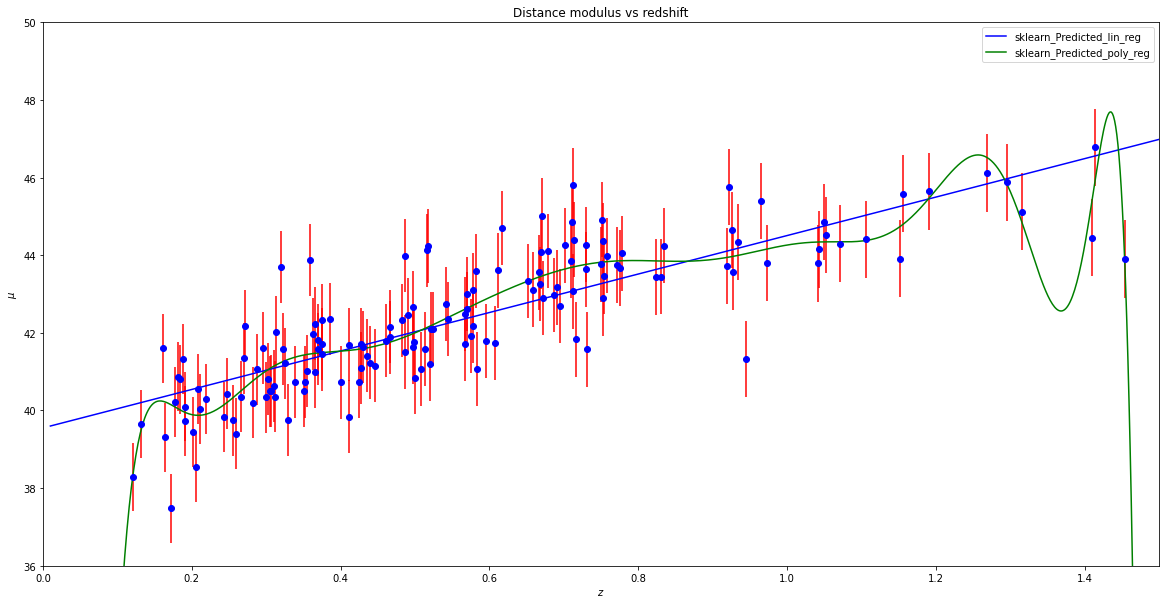

In [18]:
# YOUR CODE HERE
# raise NotImplementedError()
# recall the distance modulus mu vs redhift z, including error bars
plot_dist_mod()
# plot sklearn predict lin reg curve
mu_pred_lin = predict_lin_reg([lin_reg.intercept_,lin_reg.coef_[0]], z)
plt.plot(z,mu_pred_lin,'b-',label="sklearn_Predicted_lin_reg")

z_reshape = z.reshape(len(z),1)
# plot sklearn predict poly reg curve
z_sample_poly = poly_features.transform(z_reshape)
mu_pred_poly = lin_reg_poly.predict(z_sample_poly)
plt.plot(z,mu_pred_poly,'g-',label="sklearn_Predicted_poly_reg")
plt.legend()
plt.show


In [19]:
check_var_defined('mu_pred_poly')
assert mu_pred_poly.shape == (len(z),)

mu_pred_poly defined.


*Comment on the accuracy of your models.*

YOUR ANSWER HERE:

Obviously, the linear model increases with z growing. And we can see that there are many of the data points have significant distance with the linear straight line, which means the variance in this model is high and the model could be underfitting.

Another one is the 15_degrees polynomial model, it definitely did a better job fitting with the data compared with the linear model. However, the polynomial model with high degrees makes the model becomes too complex, which may perform well on trainning data but poorly test error (which can also be called as high bias). Then this model could be overfitting.

*Improve your polynomial model and use the improved model to make predictions. Call the variable used to store the polynomial model `ridge_reg_poly`. Call the variable used to store the predictions for your polynomial model `mu_pred_poly_improved`.*

In [20]:
# YOUR CODE HERE
# raise NotImplementedError()
degree = 15
bias = False
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
# Train model
# YOUR CODE HERE
# consider ridge regularization parameter alpha =1
ridge_reg_poly = Pipeline((
    ("poly_features", PolynomialFeatures(degree=degree, include_bias=bias)),
    ("std_scaler", StandardScaler()),
    ("regul_reg", Ridge(alpha=1)),
))
ridge_reg_poly.fit(z_sample_reshape,mu_sample)

# z_sample_poly_improved = poly_features_improved.transform(z_reshape)
# prediction
mu_pred_poly_improved = ridge_reg_poly.predict(z_reshape)


In [21]:
check_var_defined('ridge_reg_poly')
check_var_defined('mu_pred_poly_improved')
assert mu_pred_poly_improved.shape == (len(z),), "Make sure the shape of your predictions is correct"

ridge_reg_poly defined.
mu_pred_poly_improved defined.


*Plot the predictions made with new model and all previous models considered.*

<function matplotlib.pyplot.show(close=None, block=None)>

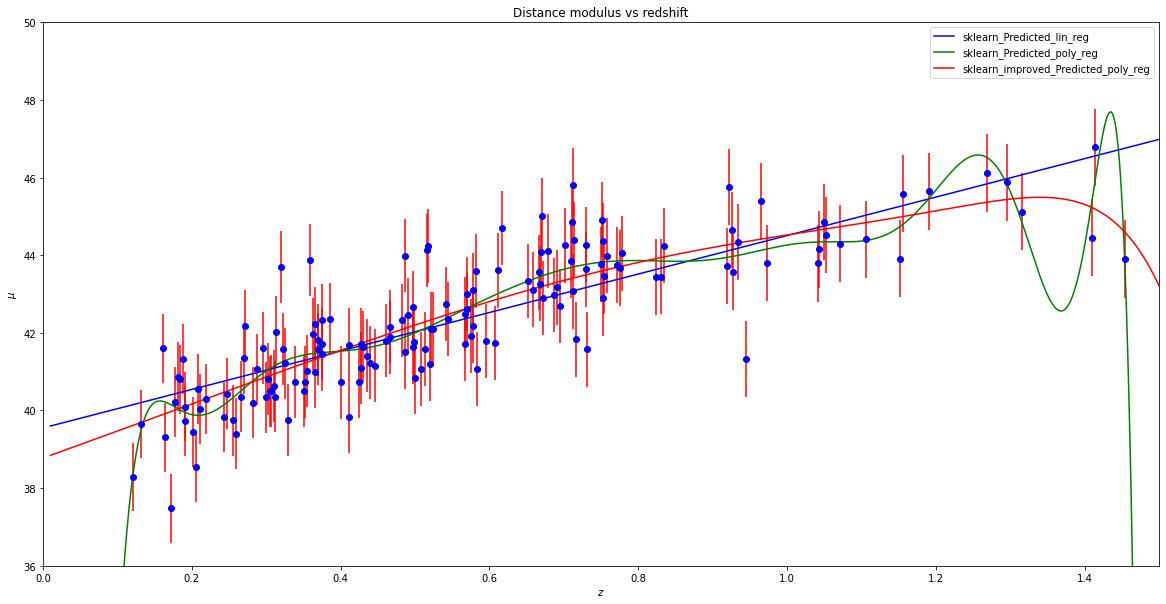

In [22]:
# YOUR CODE HERE
# raise NotImplementedError()
plot_dist_mod()
# plot sklearn predict lin reg curve
mu_pred_lin = predict_lin_reg([lin_reg.intercept_,lin_reg.coef_[0]], z)
plt.plot(z,mu_pred_lin,'b-',label="sklearn_Predicted_lin_reg")

z_reshape = z.reshape(len(z),1)
# plot sklearn predict poly reg curve
z_sample_poly = poly_features.transform(z_reshape)
mu_pred_poly = lin_reg_poly.predict(z_sample_poly)
plt.plot(z,mu_pred_poly,'g-',label="sklearn_Predicted_poly_reg")

plt.plot(z,mu_pred_poly_improved,'r-',label="sklearn_improved_Predicted_poly_reg")
plt.legend()
plt.show

*Compute the RMS error between your predictions and the* data samples*.*

In [23]:
# Define a general function to compute the RMS error
def compute_rms(mu_1, mu_2):
    # YOUR CODE HERE
    # raise NotImplementedError()
    RMS_error = np.sqrt(sum(np.power((mu_1 - mu_2),2))/len(mu_1))
    return RMS_error

In [24]:
assert np.isclose(compute_rms(mu_pred_lin, mu_pred_lin), 0.0)

In [25]:
# Compute the RMS error between the data and the predictions for each model.
# Use variables rms_sample_lin, rms_sample_poly and rms_sample_poly_improved.
# YOUR CODE HERE
# Generate model trainning prediction
mu_pred_lin = lin_reg.predict(z_sample_reshape)
mu_pred_poly = lin_reg_poly.predict(poly_features.transform(z_sample_reshape))
mu_pred_poly_improved = ridge_reg_poly.predict(z_sample_reshape)
# Calculate RMS error
rms_sample_lin = compute_rms(mu_sample,mu_pred_lin)
rms_sample_poly = compute_rms(mu_sample,mu_pred_poly)
rms_sample_poly_improved = compute_rms(mu_sample,mu_pred_poly_improved)
# print(rms_sample_lin,rms_sample_poly,rms_sample_poly_improved)
# raise NotImplementedError()

In [26]:
# Print RMS values computed.
print("rms_sample_lin = {0:.4f}".format(rms_sample_lin))
print("rms_sample_poly = {0:.4f}".format(rms_sample_poly))
print("rms_sample_poly_improved = {0:.4f}".format(rms_sample_poly_improved))

rms_sample_lin = 1.0084
rms_sample_poly = 0.8855
rms_sample_poly_improved = 0.9274


In [27]:
check_var_defined('rms_sample_lin')

rms_sample_lin defined.


In [28]:
check_var_defined('rms_sample_poly')

rms_sample_poly defined.


In [29]:
check_var_defined('rms_sample_poly_improved')

rms_sample_poly_improved defined.


*Comment on what models you believe are best.*

YOUR ANSWER HERE:

From the RSM errors we observed above, the polynomial model did the best job with fitting with sample data, on the opposite, the linear model got the largest error. Considering the underfitting and overfitting with the two models we discussed above, it all makes sense that one gets the highest error, and another gets the lowest one. 

So, the model improved with ridge regression is the best one. It gets more closer to the sweet point (balance point between underfitting and overfitting) compared with others. Therefore, I suppose it will have the best performance with test data. 

Using our cosmological concordance model we can predict the theoretical distance modulus vs redshift relationship using our understanding of the physics.

In [30]:
from astroML.cosmology import Cosmology
cosmo = Cosmology()
mu_cosmo = np.array(list(map(cosmo.mu, z)))

        Use astropy.cosmology instead. [warnings]


*Plot the data, predictions made with all regression models, and the values predicted by the cosmological model.*

<function matplotlib.pyplot.show(close=None, block=None)>

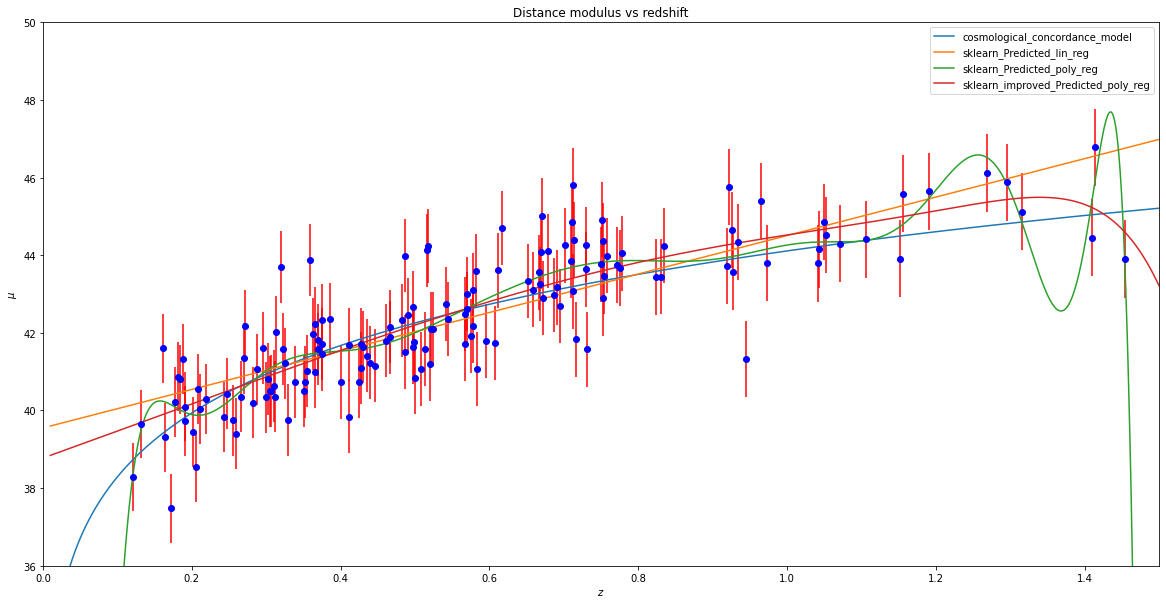

In [31]:
# YOUR CODE HERE
# raise NotImplementedError()
# YOUR CODE HERE
# raise NotImplementedError()
plot_dist_mod()

# plot cosmological concordance model predict curve

plt.plot(z,mu_cosmo,label="cosmological_concordance_model")

# plot sklearn predict lin reg curve
mu_pred_lin = predict_lin_reg([lin_reg.intercept_,lin_reg.coef_[0]], z)
plt.plot(z,mu_pred_lin,label="sklearn_Predicted_lin_reg")

# plot sklearn predict poly reg curve
z_reshape = z.reshape(len(z),1)
z_sample_poly = poly_features.transform(z_reshape)
mu_pred_poly = lin_reg_poly.predict(z_sample_poly)
plt.plot(z,mu_pred_poly,label="sklearn_Predicted_poly_reg")

# plot sklearn predict ridge reg curve
mu_pred_poly_improved = ridge_reg_poly.predict(z_reshape)
plt.plot(z,mu_pred_poly_improved,label="sklearn_improved_Predicted_poly_reg")
plt.legend()
plt.show

*Compute the RMS error between the predictions made by the cosmological model and each of the regression models, over the sample array `z`.*

In [32]:
# Compute the RMS error between the data and the predictions for each model.
# Use variables rms_cosmo_lin, rms_cosmo_poly and rms_cosmo_poly_improved.
# YOUR CODE HERE
# raise NotImplementedError()
rms_cosmo_lin = compute_rms(mu_cosmo,mu_pred_lin)
rms_cosmo_poly = compute_rms(mu_cosmo,mu_pred_poly)
rms_cosmo_poly_improved = compute_rms(mu_cosmo,mu_pred_poly_improved)

In [33]:
# Print RMS values computed.
print("rms_cosmo_lin = {0:.4f}".format(rms_cosmo_lin))
print("rms_cosmo_poly = {0:.4f}".format(rms_cosmo_poly))
print("rms_cosmo_poly_improved = {0:.4f}".format(rms_cosmo_poly_improved))

rms_cosmo_lin = 1.1252
rms_cosmo_poly = 20.6649
rms_cosmo_poly_improved = 0.8183


In [34]:
check_var_defined('rms_cosmo_lin')

rms_cosmo_lin defined.


In [35]:
check_var_defined('rms_cosmo_poly')

rms_cosmo_poly defined.


In [36]:
check_var_defined('rms_cosmo_poly_improved')

rms_cosmo_poly_improved defined.


*Comment on the RMS values computed and the implications for the accuracy of the different regression models considered.*

YOUR ANSWER HERE:

Not surprised with these results above. Combined with what We discussed already, the linear model is too "simple" (underfitting) and the polynomial model is too "complex" (overfitting). So, the polynomial model gets the largest error (more than 10 times than linear model) and the linear model gets 1.1252 error (still slightly larger than the ridge regression model). And without doubt, the ridge regression model (improved model) gets the lowest error with the most accurate result. 

---

## Part 2: Classification

In these exercises we will consider classification of [RR Lyrae](https://en.wikipedia.org/wiki/RR_Lyrae_variable) variable stars.  RR Lyrae variables are often used as standard candles to measure astronomical distances since their period of pulsation can be related to their absolute magnitude.

Observations of star magnitudes are made in each [SDSS filter band](http://skyserver.sdss.org/dr2/en/proj/advanced/color/sdssfilters.asp): u, g, r, i, z.

We will consider the space of astronomical "colours" to distinguish RR Lyraes from background stars.  Astronomical colours are simply differences in magnitudes between bands, e.g. u-g, g-r, r-i, i-z.  You can find further background [here](https://en.wikipedia.org/wiki/Color%E2%80%93color_diagram).

First, download the data.  (This may take some time on first execution.  Subsequently executions will read from cached data on your system.)

In [37]:
# Load data
from astroML.datasets import fetch_rrlyrae_combined
X, y = fetch_rrlyrae_combined()

You can learn more about the format of the returned data [here](http://www.astroml.org/modules/generated/astroML.datasets.fetch_rrlyrae_combined.html).  In particular, note that the columns of `X` are u-g, g-r, r-i, i-z.

*Construct a Pandas DataFrame for the `X` data and a Series for the `y` data.  Call your Pandas objects `X_pd` and `y_pd` respectively.*

Be sure to give your colums the correct colour name, e.g. 'u-g'.

In [38]:
import pandas as pd
cols=['u-g', 'g-r', 'r-i', 'i-z']
# YOUR CODE HERE
# raise NotImplementedError()
X_pd = pd.DataFrame(X, columns=cols)

In [39]:
check_var_defined('X_pd')
X_pd.head()

X_pd defined.


,u-g,g-r,r-i,i-z
0,1.250999,0.394000,0.137000,0.061999
1,1.048000,0.339001,0.151999,0.023001
2,1.008001,0.341999,0.129000,0.203001
3,0.965000,0.392000,0.149000,0.150000
4,1.040001,0.333000,0.125999,0.101999


In [40]:
# YOUR CODE HERE
# raise NotImplementedError()
y_pd = pd.Series(y)
# print(y_pd)

In [41]:
check_var_defined('y_pd')
y_pd.head()

y_pd defined.


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

*Combine your data and targets into a single Pandas DataFrame, labelling the target column 'target'.  Call the resulting Pandas DataFrame `X_pd_all`.*

In [42]:
# YOUR CODE HERE
# raise NotImplementedError()
y_pd = pd.Series(y, name='target',dtype=int)
X_pd_all = pd.merge(X_pd, y_pd, left_index=True, right_index=True)
# display(X_pd_all)


In [43]:
check_var_defined('X_pd_all')
X_pd_all.head()

X_pd_all defined.


,u-g,g-r,r-i,i-z,target
0,1.250999,0.394000,0.137000,0.061999,0
1,1.048000,0.339001,0.151999,0.023001,0
2,1.008001,0.341999,0.129000,0.203001,0
3,0.965000,0.392000,0.149000,0.150000,0
4,1.040001,0.333000,0.125999,0.101999,0


*Add a 'target description' column to your existing `X_pd_all` DataFrame, with fields 'Background' and 'RR Lyrae' to specify the target type.*

In [44]:
# YOUR CODE HERE
# raise NotImplementedError()
target_description = pd.Series(['Background', 'RR Lyrae'] ,name="target description")
X_pd_all = pd.merge(X_pd_all, target_description,left_on='target',right_index=True)


In [45]:
X_pd_all.head()
X_pd_all.tail()


,u-g,g-r,r-i,i-z,target,target description
93136,0.962999,0.059000,-0.025999,-0.025000,1,RR Lyrae
93137,1.059999,0.185001,0.050999,-0.023998,1,RR Lyrae
93138,1.044001,0.212000,0.035000,0.002001,1,RR Lyrae
93139,1.064999,0.172001,0.042000,0.003000,1,RR Lyrae
93140,1.125999,0.065001,-0.017000,-0.057999,1,RR Lyrae


*How many RR Lyrae variable stars are there in the dataset (i.e compute `n_rrlyrae`)?*

In [46]:
# YOUR CODE HERE
# raise NotImplementedError()
n_rrlyrae = X_pd_all[(X_pd_all.target == 1)].shape[0]
# print(n_rrlyrae)

In [47]:
check_var_defined('n_rrlyrae')
print("n_rrlyrae = {0}".format(n_rrlyrae))

n_rrlyrae defined.
n_rrlyrae = 483


*How many background stars are there in the dataset (i.e. compute `n_background`)?*

In [48]:
# YOUR CODE HERE
# raise NotImplementedError()
n_background = X_pd_all[(X_pd_all.target == 0)].shape[0]

In [49]:
check_var_defined('n_background')
print("n_background = {0}".format(n_background))

n_background defined.
n_background = 92658


*Plot scatter plot pairs for all colour combinations using `seaborn`.  Colour the points by target type. Make sure the distribution plots are normalised to have an area of 1 under the curve for each of the classes.*

In [50]:
%matplotlib inline
import seaborn as sns; sns.set()

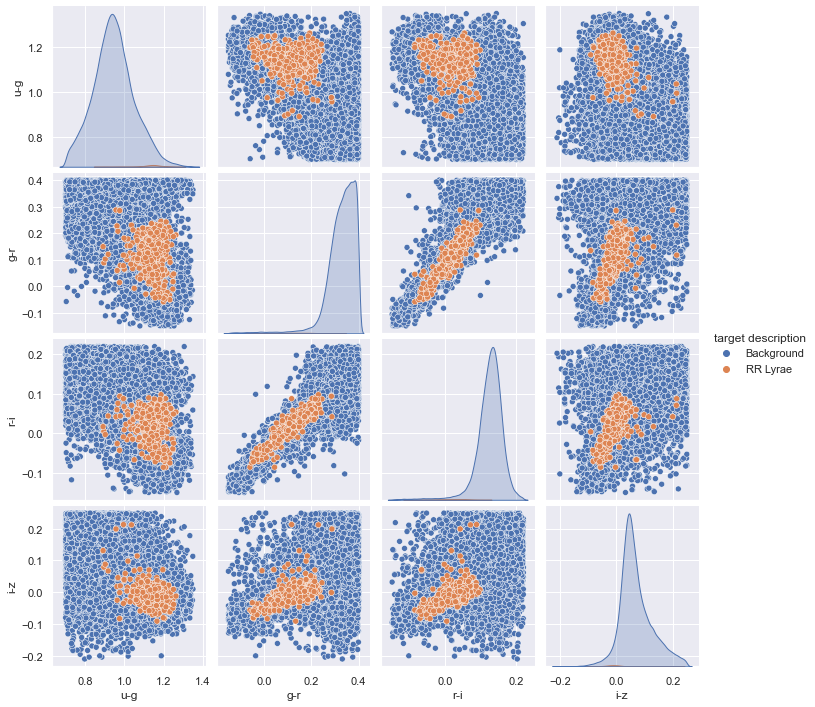

In [51]:
# YOUR CODE HERE
# raise NotImplementedError()
scatter_plot = sns.pairplot(X_pd_all, hue='target description',vars=cols, kind='scatter')


Let's separate the data into training and test sets, keeping 25% of the data for testing.  

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

First let's consider 1D classification for the zeroth colour, i.e. $u-g$. 

In [53]:
ind = 0
col=cols[ind]
col

'u-g'

In [54]:
X_train_1d = X_train[:, ind]
X_train_1d = X_train_1d.reshape(-1,1)
X_test_1d = X_test[:, ind]
X_test_1d = X_test_1d.reshape(-1,1)

To get some further intuition about the 1D classiciation problem consider a 1D plot of
class against colour.

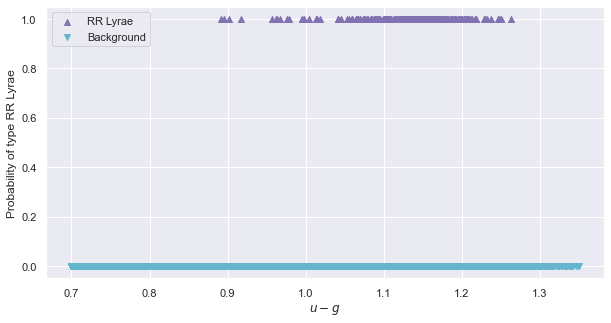

In [55]:
def plot_scatter():
    plt.figure(figsize=(10,5))
    plt.scatter(X_train_1d[y_train==1], y_train[y_train==1], c='m', marker='^', label='RR Lyrae')
    plt.scatter(X_train_1d[y_train==0], y_train[y_train==0], c='c', marker='v', label='Background')
    plt.xlabel('$' + col + '$')
    plt.ylabel('Probability of type RR Lyrae')
plot_scatter()    
plt.legend()

*Given the plot shown above, comment on how well you expect logistic regression to perform.*

YOUR ANSWER HERE:

Observing the plot above, we can see that 'the RR Lyrae' appears slightly lower than 0.9 of 'u-g' and ends at approximtely 1.27 of 'u-g'. And it can be observed that with 'u-g' increasing RR Lyrae occurs the most around the middle of 1.1 to 1.2. With this feature, we can set the initial decision boundary guess at 1.15. But 'the Background' appears highly frequent on 0.7 to approximtely 1.36 of 'u-g'. Therefore, We assume the predictions by logistic regression will not have a good performance.



*Where would you guess the decision bounary should lie?  Set the variable `decision_boundary_guess` to your guess.*

In [56]:
# YOUR CODE HERE
# raise NotImplementedError()
decision_boundary_guess = (1.1 + 1.2)/2

In [57]:
check_var_defined('decision_boundary_guess')
print("decision_boundary_guess = {0:.4f}".format(decision_boundary_guess))

decision_boundary_guess defined.
decision_boundary_guess = 1.1500


Use Scikit-Learn to perform logistic regression to classify the two classes for this 1D problem.

First, set the inverse regularation strength `C` such that regularisation is effecitvely not performed.

In [58]:
C = 1e10

*Second, fit the model using Scikit-Learn. Use the variable `clf` for your classification model.*

In [59]:
# YOUR CODE HERE
# raise NotImplementedError()
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=C)
clf.fit(X_train_1d,y_train)

LogisticRegression(C=10000000000.0)

In [60]:
check_var_defined('clf')

clf defined.


*Compute the decision boundary of the logistic regression model fitted by Scikit-Learn.  User variable `decision_boundary_sklearn` for your result.*

(Ensure your result is a scalar and not an array of length 1.)

In [61]:
# YOUR CODE HERE
# raise NotImplementedError()
# set up data
X_1d_new = np.linspace(0.3, 2.0, 1000).reshape(-1, 1)
y_1d_proba = clf.predict_proba(X_1d_new)

decision_boundary_sklearn = X_1d_new[y_1d_proba[:, 1] >= 0.5][0]
# Ensure your result is a scalar and not an array of length 1
decision_boundary_sklearn = decision_boundary_sklearn[0]


In [62]:
check_var_defined('decision_boundary_sklearn')
assert not hasattr(decision_boundary_sklearn, "__len__")
print("decision_boundary_sklearn = {0:.4f}".format(decision_boundary_sklearn))

decision_boundary_sklearn defined.
decision_boundary_sklearn = 1.3721


*Evaluate the probabilities predicted by your logistic regression model over the domain specified by the variable `X_1d_new`. Use variable `y_1d_proba` for your computed probabilities.*

In [63]:
X_1d_new = X_1d_new
# YOUR CODE HERE
# raise NotImplementedError()

y_1d_proba = y_1d_proba

In [64]:
check_var_defined('y_1d_proba')

y_1d_proba defined.


*Plot the probability of a star being of type RR Lyrae against the colour variable considered.  Also plot the probability of being a Background star.  Overlay these plots on the scatter plot of class types.  Also plot the decision boundary that you guessed previously and the one computed by Scikit-Learn.*

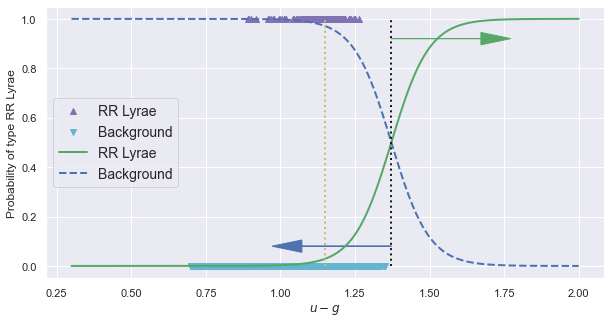

In [65]:
plot_scatter()
plt.plot(X_1d_new, y_1d_proba[:, 1], "g-", linewidth=2, label="RR Lyrae")
plt.plot(X_1d_new, y_1d_proba[:, 0], "b--", linewidth=2, label="Background")
plt.plot([decision_boundary_sklearn, decision_boundary_sklearn], [0, 1], "k:", linewidth=2)
plt.plot([decision_boundary_guess, decision_boundary_guess], [0, 1], "y:", linewidth=2)
plt.arrow(decision_boundary_sklearn, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary_sklearn, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.legend(loc="center left", fontsize=14)
# YOUR CODE HERE
# raise NotImplementedError()

*From inspection of your plot, how would all objects in the training set be classified?*

YOUR ANSWER HERE:

Both 'the Background' and 'the RR Lyrae' are all on the left of the decision boundary. Can not classify these two feature by 'u-g'.



*Use your logistic regression model fitted by Scikit-Learn to predict the class of all objects in the test set. User variable `y_test_1d_pred` to specify your answer.*

In [66]:
# YOUR CODE HERE
# raise NotImplementedError()
y_test_1d_pred = clf.predict(X_test_1d)
# print(len(y_test_1d_pred))

In [67]:
check_var_defined('y_test_1d_pred')

y_test_1d_pred defined.


*How many objects are classified as of type RR Lyrae?  Use variable `n_rrlyrae_pred` to specify your answer.*

In [68]:
# YOUR CODE HERE
# raise NotImplementedError()
# print(y_test_1d_pred)
n_rrlyrae_pred = 0
for pred in y_test_1d_pred:
    n_rrlyrae_pred += 1 if pred == 1 else n_rrlyrae_pred



In [69]:
check_var_defined('n_rrlyrae_pred')
assert n_rrlyrae_pred % 1 == 0 # check integer
print("n_rrlyrae_pred = {0}".format(n_rrlyrae_pred))

n_rrlyrae_pred defined.
n_rrlyrae_pred = 0


*How many objects are classified as of type Background?  Use variable `n_background_pred` to specify your answer.*

In [70]:
# YOUR CODE HERE
# raise NotImplementedError()
n_background_pred = 0
for pred in y_test_1d_pred:
    n_background_pred += 1 if pred == 0 else n_background_pred


In [71]:
check_var_defined('n_background_pred')
assert n_background_pred % 1 == 0 # check integer
print("n_background_pred = {0}".format(n_background_pred))

n_background_pred defined.
n_background_pred = 23286


Let's check the Scikit-Learn result by solving the logistic regression problem (without regularisation) manually.

Recall that the cost function for logistic regression is given by
$$
C(\theta) = -\frac{1}{m} \sum_{i=1}^m 
\left [ 
y^{(i)} \log(\hat{p}^{(i)})
+
(1 - y^{(i)}) \log(1 - \hat{p}^{(i)})
\right],
$$


where

$$\hat{p} = \sigma(\theta^\text{T} x) = \frac{1}{1+\exp{(-\theta^\text{T} x)}}. $$

Show analytically that the derivative of the cost function is given by
$$\begin{eqnarray}
\frac{\partial C}{\partial \theta} 
&=& 
\frac{1}{m} \sum_{i=1}^m 
\left[ \sigma\left(\theta^{\rm T} x^{(i)} \right) - y^{(i)} \right]
x^{(i)}\\
&=&
\frac{1}{m} 
X^{\rm T}
\left[ \sigma\left(X \theta \right) - y \right]
\end{eqnarray}$$

(use latex mathematics expressions).

*First, simplify the cost function terms $\log(\hat{p})$ and $\log(1-\hat{p})$ to express in terms linear in $\log\left({1+{\rm e}^{-\theta^{\rm T}x}}\right)$.*

(You may drop $i$ superscripts for notational brevity.)

YOUR ANSWER HERE：

simplify the cost function terms $\log(\hat{p})$:
$$\log(\hat{p}) = \log\left(\frac{1}{1+{\rm e}^{-\theta^{\rm T}x}}\right)$$
$$\log(\hat{p}) = \log(1)-\log\left({1+{\rm e}^{-\theta^{\rm T}x}}\right)$$
$$\log(\hat{p}) = 0-\log\left({1+{\rm e}^{-\theta^{\rm T}x}}\right)$$
$$\log(\hat{p}) = -\log\left({1+{\rm e}^{-\theta^{\rm T}x}}\right)$$
simplify the cost function terms $\log(1-\hat{p})$:
$$\log(1-\hat{p}) = \log\left(1-\frac{1}{1+{\rm e}^{-\theta^{\rm T}x}}\right)$$
$$\log(1-\hat{p}) = \log\left(\frac{{\rm e}^{-\theta^{\rm T}x}}{1+{\rm e}^{-\theta^{\rm T}x}}\right)$$
$$\log(1-\hat{p}) = \log({\rm e}^{-\theta^{\rm T}x})-\log\left({1+{\rm e}^{-\theta^{\rm T}x}}\right)$$
$$\log(1-\hat{p}) = ({-\theta^{\rm T}x})-\log\left({1+{\rm e}^{-\theta^{\rm T}x}}\right)$$

*Next, substitute these terms into the cost function and simplify to also express the cost function in terms linear in $\log\left({1+{\rm e}^{-\theta^{\rm T}x}}\right)$.*

YOUR ANSWER HERE:
$$
C(\theta) = -\frac{1}{m} \sum_{i=1}^m 
\left [- y^{(i)}\log\left({1+{\rm e}^{-\theta^{\rm T}x}}\right)+(1 - y^{(i)}) (({-\theta^{\rm T}x})-\log\left({1+{\rm e}^{-\theta^{\rm T}x}}\right))
\right]
$$
$$
C(\theta) = -\frac{1}{m} \sum_{i=1}^m 
\left [- y^{(i)}\log\left({1+{\rm e}^{-\theta^{\rm T}x}}\right)-(1 - y^{(i)}) {\theta^{\rm T}x}-(1 - y^{(i)})\log\left({1+{\rm e}^{-\theta^{\rm T}x}}\right)
\right]
$$
$$
C(\theta) = \frac{1}{m} \sum_{i=1}^m 
\left [ y^{(i)}\log\left({1+{\rm e}^{-\theta^{\rm T}x}}\right)+(1 - y^{(i)}) {\theta^{\rm T}x}+(1 - y^{(i)})\log\left({1+{\rm e}^{-\theta^{\rm T}x}}\right)
\right]
$$
$$
C(\theta) = \frac{1}{m} \sum_{i=1}^m 
\left [(1 - y^{(i)}) {\theta^{\rm T}x}+(y^{(i)}+(1 - y^{(i)}))\log\left({1+{\rm e}^{-\theta^{\rm T}x}}\right)
\right]
$$
$$
C(\theta) = \frac{1}{m} \sum_{i=1}^m 
\left [(1 - y^{(i)}) {\theta^{\rm T}x}+\log\left({1+{\rm e}^{-\theta^{\rm T}x}}\right)
\right]
$$
$$
C(\theta) = -\frac{1}{m}(\sum_{i=1}^m 
\left [{\theta^{\rm T}x}y^{(i)}-{\theta^{\rm T}x}-\log\left({1+{\rm e}^{-\theta^{\rm T}x}}\right)
\right])
$$
$$
C(\theta) = -\frac{1}{m}(\sum_{i=1}^m 
\left [{\theta^{\rm T}x}y^{(i)}-\log\left({1+{\rm e}^{\theta^{\rm T}x}}\right)
\right])
$$

*Now compute the derivative of the cost function with respect to variable $\theta_j$, i.e. compute $\partial C / \partial \theta_j$.*

YOUR ANSWER HERE:
$$
\frac{\partial C}{\partial \theta_j} = -\frac{1}{m}\frac{\partial}{\partial \theta_j}(\sum_{i=1}^m 
\left [{\theta^{\rm T}x}y^{(i)}-\log\left({1+{\rm e}^{\theta^{\rm T}x}}\right)
\right])
$$
$$
\frac{\partial C}{\partial \theta_j} = -\frac{1}{m}(\sum_{i=1}^m 
\left [{x}y^{(i)}-\frac{x{\rm e}^{\theta^{\rm T}x}}{1+{\rm e}^{\theta^{\rm T}x}}
\right])
$$
$$
\frac{\partial C}{\partial \theta_j} = -\frac{1}{m}(\sum_{i=1}^m 
\left [{x}y^{(i)}-\frac{x}{1+{\rm e}^{-\theta^{\rm T}x}}
\right])
$$
$$
\frac{\partial C}{\partial \theta_j} = -\frac{1}{m}(\sum_{i=1}^m 
\left [x(y^{(i)}-\frac{1}{1+{\rm e}^{-\theta^{\rm T}x}})
\right])
$$
$$
\frac{\partial C}{\partial \theta_j} = -\frac{1}{m}(\sum_{i=1}^m 
\left [x(y^{(i)}-\sigma(\theta^\text{T} x))
\right])
$$

*Combine terms for all $\theta_j$ to give the overall derivative with respect to $\theta$, i.e. $\partial C / \partial \theta$.*

YOUR ANSWER HERE:

set X as the combined of $x^{(i)}$ and Y as the combined of $y^{(i)}$
$$
\frac{\partial C}{\partial \theta} = \frac{1}{m}(
X^\text{T}(\sigma(\theta^\text{T} X)-Y))
$$

Using the analytically expression for the derivative of the cost function, we will solve the logistic regression problem by implementing a gradient descent algorithm.

*First, define the sigmoid function.*

In [72]:
def sigmoid(x):
    # YOUR CODE HERE
    # raise NotImplementedError()
    logistic_func = 1/(1 + np.exp(-x))
    return logistic_func

In [73]:
assert np.isclose(sigmoid(0), 0.5)

*Next, extend the training data to account for a bias term in your model. Use variable `X_train_1d_b` to specify your result.*

In [74]:
# YOUR CODE HERE
# raise NotImplementedError()
X_train_1d_b = np.c_[np.ones((len(X_train_1d),1)),X_train_1d]

In [75]:
check_var_defined('X_train_1d_b')

X_train_1d_b defined.


*Implement batch gradient descent to fit the parameters of your logistic regression model.  Consider `n_iterations = 40000` iterations and a learning rate of `alpha = 10.0`. Consider a starting point of $\theta_0 = (1, 1)$, i.e. `theta = np.array([[1], [1]])`. Use variable `theta` to specify your estimated parameters.*

In [76]:
n_iterations = 40000
alpha = 10.0
theta = np.array([[1], [1]])
# YOUR CODE HERE
# print(X_train_1d_b.shape, y_train.shape, theta.shape)
def gradient_descent(alpha, theta, x_train, y_train):
    for iteration in range(n_iterations):
        gradient_descent = (1 / (X_train_1d_b.shape[0])) * np.transpose(X_train_1d_b) @ (sigmoid(X_train_1d_b @ (theta)) - y_train)
        theta = theta - alpha * gradient_descent
    return theta

# have tp reshape y training data 
y_train_reshape = y_train.reshape(len(y_train), 1)
theta = gradient_descent(alpha, theta, X_train_1d_b, y_train_reshape)
# print(theta.shape)

In [77]:
check_var_defined('theta')
print("theta[0] = {0:.4f}".format(theta[0][0]))
print("theta[1] = {0:.4f}".format(theta[1][0]))

theta defined.
theta[0] = -21.7012
theta[1] = 15.8176


*Compute the difference between the logistic regression model intercept computed by Scikit-Learn and manually.  Use variable `intercept_diff` for your result.*

In [78]:
# YOUR CODE HERE
# raise NotImplementedError()
intercept_scikit_learn = clf.intercept_
intercept_manually = theta[0]
intercept_diff = float(intercept_scikit_learn - intercept_manually)
# print(intercept_scikit_learn.shape,intercept_scikit_learn, intercept_manually.shape,intercept_manually,intercept_diff )

In [79]:
check_var_defined('intercept_diff')
print("intercept_diff = {0:.4E}".format(intercept_diff))

intercept_diff defined.
intercept_diff = -1.0836E-03


*Compute the difference between the logistic regression model* slope *(i.e. coefficient) computed by Scikit-Learn and manually.  Use variable `coeff_diff` for your result.*

In [80]:
# YOUR CODE HERE
# raise NotImplementedError()
coeff_scikit_learn = clf.coef_
coeff_manually = theta[1]
coeff_diff = float(intercept_scikit_learn - intercept_manually)

In [81]:
check_var_defined('coeff_diff')
print("coeff_diff = {0:.4E}".format(coeff_diff))

coeff_diff defined.
coeff_diff = -1.0836E-03


You should find that the solution from your gradient descent algorithm is close (although not identical) to that recovered by Scikit-Learn. 

Both fitted logistic regression models, however, are not effective. The reason for this is because of class imbalance.  *Describe the class imbalance problem in your own words and how it manifests itself in the classification problem at hand.*

YOUR ANSWER HERE:

According to 'n_rrlyrae' and 'n_background' indicators, it can be observed that in the data we used, there are only 483 classified as 'RR Lyrae' compared with 92658 classifed as 'background' is too small, which results the classifer only classifed data to the larger class('background') even the regression model is fitted well.

The class imbalance problem can be addressed by weighting the training data in a manner that is inversely proportional to their frequency.

*Repeat the fitting of your linear regression model but this time perform class weighting.  Use variable `clf_balanced` for your new model.*

See the `class_weight` argument of the Scikit-Learn [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier for further details on how to perform class weighting.

In [82]:
# YOUR CODE HERE
# raise NotImplementedError()
clf_balanced = LogisticRegression(C=C,class_weight='balanced')
clf_balanced.fit(X_train_1d,y_train)


LogisticRegression(C=10000000000.0, class_weight='balanced')

In [83]:
check_var_defined('clf_balanced')

clf_balanced defined.


*Compute the decision boundary of the logistic regression model fitted by Scikit-Learn when weighting classes.* 

(Ensure your result is a scalar and not an array of length 1.)

In [84]:
# YOUR CODE HERE
# raise NotImplementedError()
X_1d_new = np.linspace(0.3, 2.0, 1000).reshape(-1, 1)
y_1d_proba_balanced = clf_balanced.predict_proba(X_1d_new)

decision_boundary_sklearn_balanced = X_1d_new[y_1d_proba_balanced[:, 1] >= 0.5][0]
# Ensure your result is a scalar and not an array of length 1
decision_boundary_sklearn_balanced = decision_boundary_sklearn_balanced[0]


In [85]:
check_var_defined('decision_boundary_sklearn_balanced')
assert not hasattr(decision_boundary_sklearn_balanced, "__len__")
print("decision_boundary_sklearn_balanced = {0:.4f}".format(decision_boundary_sklearn_balanced))

decision_boundary_sklearn_balanced defined.
decision_boundary_sklearn_balanced = 1.0607


*Evaluate the probabilities prediced by your new logistic regression model over the domain specified by the variable `X_1d_new`. Use variable `y_1d_proba_balanced` for your computed probabilities.*

In [86]:
# YOUR CODE HERE
# raise NotImplementedError()
y_1d_proba_balanced = y_1d_proba_balanced

In [87]:
check_var_defined('y_1d_proba_balanced')

y_1d_proba_balanced defined.


*For your new balanced model, plot the probability of a star being of type RR Lyrae against the colour variable considered.  Also plot the probability of being a Background star.  Overlay these plots on the scatter plot of class types.  Also plot the decision boundary that you guessed previously, the one computed by Scikit-Learn initially, and the one computed by Scikit-Learn for your new balanced model.*

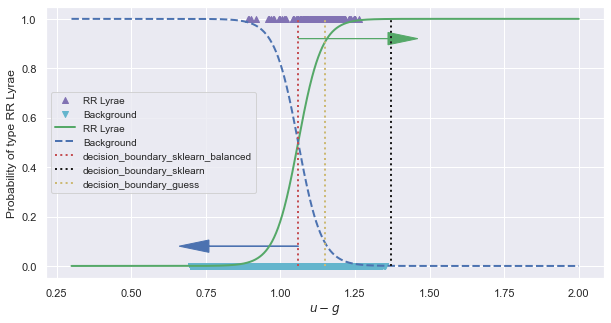

In [88]:
plot_scatter()
# YOUR CODE HERE
# raise NotImplementedError()
plt.plot(X_1d_new, y_1d_proba_balanced[:, 1], "g-", linewidth=2, label="RR Lyrae")
plt.plot(X_1d_new, y_1d_proba_balanced[:, 0], "b--", linewidth=2, label="Background")
plt.plot([decision_boundary_sklearn_balanced, decision_boundary_sklearn_balanced], [0, 1], "r:", linewidth=2, label = "decision_boundary_sklearn_balanced")
plt.plot([decision_boundary_sklearn, decision_boundary_sklearn], [0, 1], "k:", linewidth=2, label = "decision_boundary_sklearn")
plt.plot([decision_boundary_guess, decision_boundary_guess], [0, 1], "y:", linewidth=2, label = "decision_boundary_guess")
plt.arrow(decision_boundary_sklearn_balanced, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary_sklearn_balanced, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.legend(loc="center left", fontsize=10)

*Comment on the decision boundary of the balanced model compared to the unbalanced models fitted previously.*

YOUR ANSWER HERE:

This decision boundary of the balanced model compared with the unbalanced one definitely fitted much better. It cut the 'RR Lyrae' in the middle and left the most frequent data to the right. This model will perform better than the previous one.

Now that we've built up good intuition surrounding the subtleties of the classification problem at hand in 1D, let's consider the 2D problem (we will keep to 2D for plotting convenience).

For the 2D case we consider the following colours.

In [89]:
ind = 1
cols[:ind+1]

['u-g', 'g-r']

Consider the following training and test data for the 2D problem.

In [90]:
X_train_2d = X_train[:, :ind+1]
X_train_2d = X_train_2d.reshape(-1,ind+1)
X_test_2d = X_test[:, :ind+1]
X_test_2d = X_test_2d.reshape(-1,ind+1)

*Train a logistic regression model for this 2D problem.  Use variable `clf_2d_logistic` for your classifier.*

In [91]:
# YOUR CODE HERE
# raise NotImplementedError()
clf_2d_logistic = LogisticRegression(C=C, class_weight='balanced')
clf_2d_logistic.fit(X_train_2d, y_train)

LogisticRegression(C=10000000000.0, class_weight='balanced')

In [92]:
check_var_defined('clf_2d_logistic')

clf_2d_logistic defined.


*Compute the precision and recall of your 2D logistic regression model. Use variables `precision_logistic` and `recall_logistic` for your results.*

In [93]:
# YOUR CODE HERE
# raise NotImplementedError()

from sklearn.metrics import confusion_matrix
y_train_2d_pred = clf_2d_logistic.predict(X_train_2d)
tn, fp, fn, tp = confusion_matrix(y_train, y_train_2d_pred).ravel()
# print(tn, fp, fn, tp)

# Precision = TruePositives / (TruePositives + FalsePositives)
precision_logistic = tp / (tp + fp)

# Recall = TruePositives / (TruePositives + FalseNegatives)
recall_logistic = tp / (tp + fn)


In [94]:
check_var_defined('precision_logistic')
print("precision_logistic = {0:.6f}".format(precision_logistic))

precision_logistic defined.
precision_logistic = 0.141589


In [95]:
check_var_defined('recall_logistic')
print("recall_logistic = {0:.6f}".format(recall_logistic))

recall_logistic defined.
recall_logistic = 0.985955


Consider the following meshgrid defining the u-g and g-r colour domain of interest.

In [96]:
xlim = (0.7, 1.45)  # u-g
ylim = (-0.15, 0.4) # g-r
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))

*Over the domain specified above plot the predicted classification probability.  Overlay on your plot the data instances, highlighting whether a RR Lyrae or background star, and the decision boundary.*

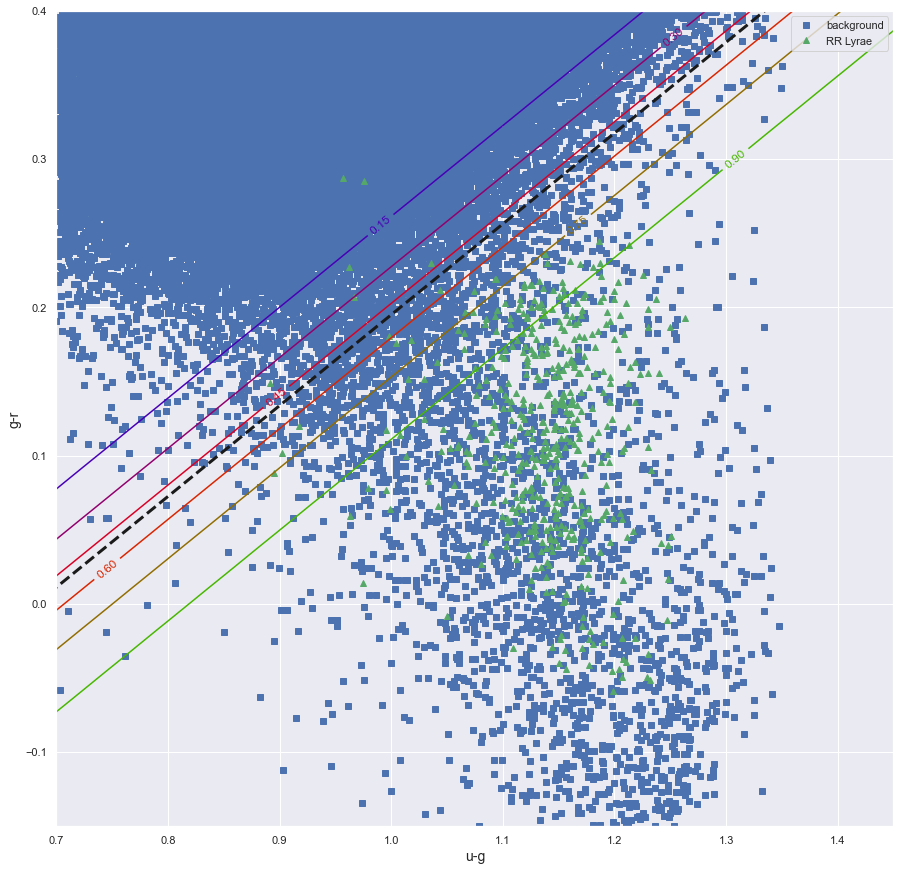

In [97]:
# YOUR CODE HERE
# raise NotImplementedError()
plt.figure(figsize=(15,15))

# Plot the data instances
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label = 'background')
plt.plot(X[y==1, 0], X[y==1, 1], "g^", label = 'RR Lyrae')

X_new = np.c_[xx.ravel(), yy.ravel()]
y_proba = clf_2d_logistic.predict_proba(X_new)
zz = y_proba[:, 1].reshape(xx.shape)

# Plot decision boundary
left_right = np.array([0, 14]) 
contour = plt.contour(xx, yy, zz, cmap=plt.cm.brg)
boundary = -(clf_2d_logistic.coef_[0][0] * left_right + clf_2d_logistic.intercept_[0]) / clf_2d_logistic.coef_[0][1]
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.axis([0.7, 1.45,-0.15, 0.4])
plt.xlabel("u-g", fontsize=14)
plt.ylabel("g-r", fontsize=14)
plt.legend()

*Now train an SVM classifier that can support a non-linear decision boundary on the same problem.*

In [103]:
# YOUR CODE HERE
# raise NotImplementedError()
from sklearn.svm import SVC
svm_classifier = SVC(kernel= 'rbf', class_weight= 'balanced', C=100, gamma=5)
svm_classifier.fit(X_train_2d,y_train)


SVC(C=100, class_weight='balanced', gamma=5)

*Replicate for the SVM your plot above for the 2D logistic regression model.  Over the domain specified above plot the decision function score.  Overlay on your plot the data instances, highlighting whether a RR Lyrae or background star, and the decision boundary.*

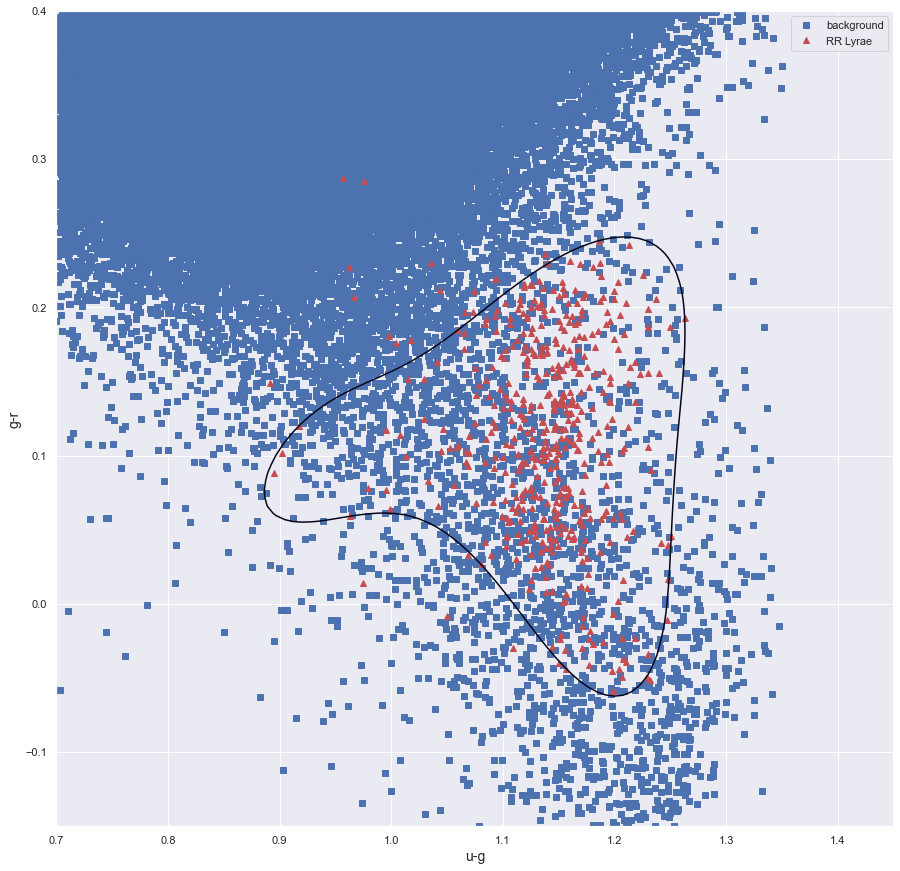

In [104]:
# YOUR CODE HERE
# raise NotImplementedError()
plt.figure(figsize=(15,15))

# Plot the data instances
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label = 'background')
plt.plot(X[y==1, 0], X[y==1, 1], "r^", label = 'RR Lyrae')

X_new = np.c_[xx.ravel(), yy.ravel()]
y_proba = svm_classifier.decision_function(X_new)
# print(y_proba,y_proba.shape,X_new.shape)

# Plot decision boundary
cs = plt.contour(xx, yy, y_proba.reshape(100, 100),levels=[1])

plt.axis([0.7, 1.45,-0.15, 0.4])
plt.xlabel("u-g", fontsize=14)
plt.ylabel("g-r", fontsize=14)
plt.legend()

*Compute the precision and recall of your 2D SVM model. Use variables `precision_svm` and `recall_svm` for your results.*

In [105]:
# YOUR CODE HERE
# raise NotImplementedError()
y_train_2d_pred_svm = svm_classifier.predict(X_train_2d)
tn, fp, fn, tp = confusion_matrix(y_train, y_train_2d_pred_svm).ravel()
# print(tn, fp, fn, tp)

# Precision = TruePositives / (TruePositives + FalsePositives)
precision_svm = tp / (tp + fp)

# Recall = TruePositives / (TruePositives + FalseNegatives)
recall_svm = tp / (tp + fn)

In [106]:
check_var_defined('precision_svm')
print("precision_svm = {0:.6f}".format(precision_svm))

precision_svm defined.
precision_svm = 0.154216


In [107]:
check_var_defined('recall_svm')
print("recall_svm = {0:.6f}".format(recall_svm))

recall_svm defined.
recall_svm = 0.991573


*Comment on the difference in decision boundary between your logistic regression and SVM models and how this impacts the effectiveness of the models.*

YOUR ANSWER HERE:

As the svm model we set is a non-linear decision boundary. Therefore, as observed from the plot above the non-linear decision boundary does a better job of classifying classes than a straight line in this dataset. (The non-linear decision boundary only circled the area with most of the 'RR Lyrae' stars). Thus, it supposes to improve the effectiveness of the model. So, compared with the logistic regression it has a higher precision indicator and a higher recall indicator as well, which can infer to the svm model predict more 'TruePositive' than logistic regression.